## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../src')

from postprocess import *

## Interaction data processing

In [2]:
# For SATORI based interactions
#df = pd.read_csv('../results/Arabidopsis_GenomeWide_Analysis_euclidean_v8_fixed/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt', sep='\t')
##df = pd.read_csv('../../Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_Results_v9_run2_5000/interactions_summary_attnLimit-0.12.txt', sep='\t')

# For FIS based interactions
df = pd.read_csv('../results/Arabidopsis_GenomeWide_Analysis_euclidean_v8_fixed/Interactions_FIS/interactions_summary_attnLimit-10.0.txt', sep='\t')
##df = pd.read_csv('../../DFIM_Arabidopsis_experiment_v10/Interactions/interactions_summary_attnLimit-0.txt', sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [3]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.01, motifB_pval_cutoff=0.01)

In [4]:
df.shape

(517, 12)

In [5]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
4,filter1<-->filter6,203,MYB_tnt.MYB51_col_a_m1,0.003637,ZFHD_tnt.ATHB23_col_b_m1,0.003895,29.0,184.0,1133.0,1413.0,2.432322e-07,0.000004
6,filter1<-->filter11,208,MYB_tnt.MYB51_col_a_m1,0.003637,MYB_tnt.MYB51_col_a_m1,0.007254,51.0,20.0,959.0,1466.0,8.225513e-03,0.027573
7,filter1<-->filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,202.0,155.0,1592.0,1793.0,1.742161e-03,0.007440
8,filter1<-->filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,299.0,246.0,1945.0,3183.0,2.957618e-05,0.000235
9,filter1<-->filter14,211,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.009697,48.0,213.0,732.0,771.0,1.509500e-03,0.006605


### Annotate the interacting motifs

In [6]:
df['TF1'] = df['motif1'].apply(lambda x: x.split('_')[1].strip('.tnt'))
df['TF2'] = df['motif2'].apply(lambda x: x.split('_')[1].strip('.tnt'))

In [7]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
4,filter1<-->filter6,203,MYB_tnt.MYB51_col_a_m1,0.003637,ZFHD_tnt.ATHB23_col_b_m1,0.003895,29.0,184.0,1133.0,1413.0,2.432322e-07,0.000004,MYB51,ATHB23
6,filter1<-->filter11,208,MYB_tnt.MYB51_col_a_m1,0.003637,MYB_tnt.MYB51_col_a_m1,0.007254,51.0,20.0,959.0,1466.0,8.225513e-03,0.027573,MYB51,MYB51
7,filter1<-->filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,202.0,155.0,1592.0,1793.0,1.742161e-03,0.007440,MYB51,AT2G40260
8,filter1<-->filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,299.0,246.0,1945.0,3183.0,2.957618e-05,0.000235,MYB51,TCP20
9,filter1<-->filter14,211,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.009697,48.0,213.0,732.0,771.0,1.509500e-03,0.006605,MYB51,WRKY31


In [8]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [9]:
df = df[df['TF1']!=df['TF2']]

In [10]:
df.shape

(481, 15)

In [11]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [12]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [13]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter1<-->filter6,203,MYB_tnt.MYB51_col_a_m1,0.003637,ZFHD_tnt.ATHB23_col_b_m1,0.003895,29.0,184.0,1133.0,1413.0,2.432322e-07,0.000004,MYB51,ATHB23,MYB51$\longleftrightarrow$ATHB23
1,filter1<-->filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,202.0,155.0,1592.0,1793.0,1.742161e-03,0.007440,MYB51,AT2G40260,MYB51$\longleftrightarrow$AT2G40260
2,filter1<-->filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,299.0,246.0,1945.0,3183.0,2.957618e-05,0.000235,MYB51,TCP20,MYB51$\longleftrightarrow$TCP20
3,filter1<-->filter14,211,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.009697,48.0,213.0,732.0,771.0,1.509500e-03,0.006605,MYB51,WRKY31,MYB51$\longleftrightarrow$WRKY31
4,filter1<-->filter19,216,MYB_tnt.MYB51_col_a_m1,0.003637,C2H2_tnt.AtIDD11_col_a_m1,0.000900,258.0,257.0,1385.0,1798.0,6.452202e-06,0.000065,MYB51,AtIDD11,MYB51$\longleftrightarrow$AtIDD11


In [14]:
df.shape

(481, 15)

## Most Frequent TF Family Interactions

In [15]:
df['TF1_Family'] = df['motif1'].apply(lambda x: x.split('_')[0])
df['TF2_Family'] = df['motif2'].apply(lambda x: x.split('_')[0])

In [16]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [17]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [18]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter1<-->filter6,203,MYB_tnt.MYB51_col_a_m1,0.003637,ZFHD_tnt.ATHB23_col_b_m1,0.003895,29.0,184.0,1133.0,1413.0,2.432322e-07,0.000004,MYB51,ATHB23,MYB51$\longleftrightarrow$ATHB23,MYB,ZFHD,MYB$\longleftrightarrow$ZFHD
1,filter1<-->filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,202.0,155.0,1592.0,1793.0,1.742161e-03,0.007440,MYB51,AT2G40260,MYB51$\longleftrightarrow$AT2G40260,MYB,G2like,MYB$\longleftrightarrow$G2like
2,filter1<-->filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,299.0,246.0,1945.0,3183.0,2.957618e-05,0.000235,MYB51,TCP20,MYB51$\longleftrightarrow$TCP20,MYB,TCP,MYB$\longleftrightarrow$TCP
3,filter1<-->filter14,211,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.009697,48.0,213.0,732.0,771.0,1.509500e-03,0.006605,MYB51,WRKY31,MYB51$\longleftrightarrow$WRKY31,MYB,WRKY,MYB$\longleftrightarrow$WRKY
4,filter1<-->filter19,216,MYB_tnt.MYB51_col_a_m1,0.003637,C2H2_tnt.AtIDD11_col_a_m1,0.000900,258.0,257.0,1385.0,1798.0,6.452202e-06,0.000065,MYB51,AtIDD11,MYB51$\longleftrightarrow$AtIDD11,MYB,C2H2,MYB$\longleftrightarrow$C2H2


In [19]:
df['filter_interaction'] = df['filter_interaction'].apply(lambda x: x.replace('<-->',r'$\longleftrightarrow$'))

In [20]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter1$\longleftrightarrow$filter6,203,MYB_tnt.MYB51_col_a_m1,0.003637,ZFHD_tnt.ATHB23_col_b_m1,0.003895,29.0,184.0,1133.0,1413.0,2.432322e-07,0.000004,MYB51,ATHB23,MYB51$\longleftrightarrow$ATHB23,MYB,ZFHD,MYB$\longleftrightarrow$ZFHD
1,filter1$\longleftrightarrow$filter12,209,MYB_tnt.MYB51_col_a_m1,0.003637,G2like_tnt.AT2G40260_colamp_a_m1,0.000189,202.0,155.0,1592.0,1793.0,1.742161e-03,0.007440,MYB51,AT2G40260,MYB51$\longleftrightarrow$AT2G40260,MYB,G2like,MYB$\longleftrightarrow$G2like
2,filter1$\longleftrightarrow$filter13,210,MYB_tnt.MYB51_col_a_m1,0.003637,TCP_tnt.TCP20_col_a_m1,0.004183,299.0,246.0,1945.0,3183.0,2.957618e-05,0.000235,MYB51,TCP20,MYB51$\longleftrightarrow$TCP20,MYB,TCP,MYB$\longleftrightarrow$TCP
3,filter1$\longleftrightarrow$filter14,211,MYB_tnt.MYB51_col_a_m1,0.003637,WRKY_tnt.WRKY31_col_a_m1,0.009697,48.0,213.0,732.0,771.0,1.509500e-03,0.006605,MYB51,WRKY31,MYB51$\longleftrightarrow$WRKY31,MYB,WRKY,MYB$\longleftrightarrow$WRKY
4,filter1$\longleftrightarrow$filter19,216,MYB_tnt.MYB51_col_a_m1,0.003637,C2H2_tnt.AtIDD11_col_a_m1,0.000900,258.0,257.0,1385.0,1798.0,6.452202e-06,0.000065,MYB51,AtIDD11,MYB51$\longleftrightarrow$AtIDD11,MYB,C2H2,MYB$\longleftrightarrow$C2H2


In [21]:
df.to_csv('output/Arabidopsis_interactions.csv')

### Distribution of individual TF or TF family interactions

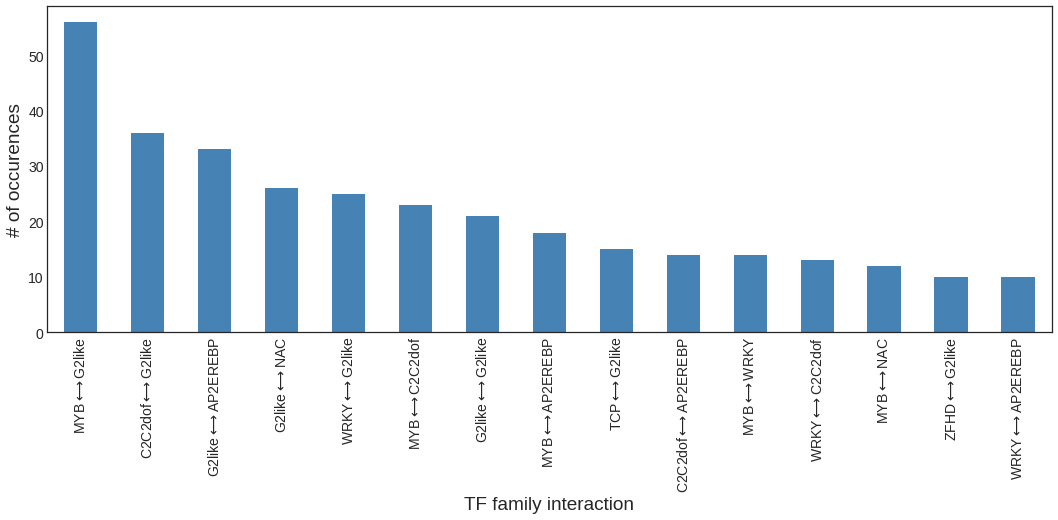

In [22]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

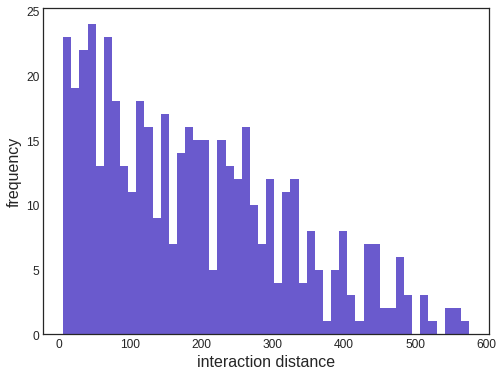

In [23]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [24]:
df['mean_distance'].mean(), df['mean_distance'].median()

(189.41995841995842, 172.0)

### Most frequent interactions and their respective interaction distances

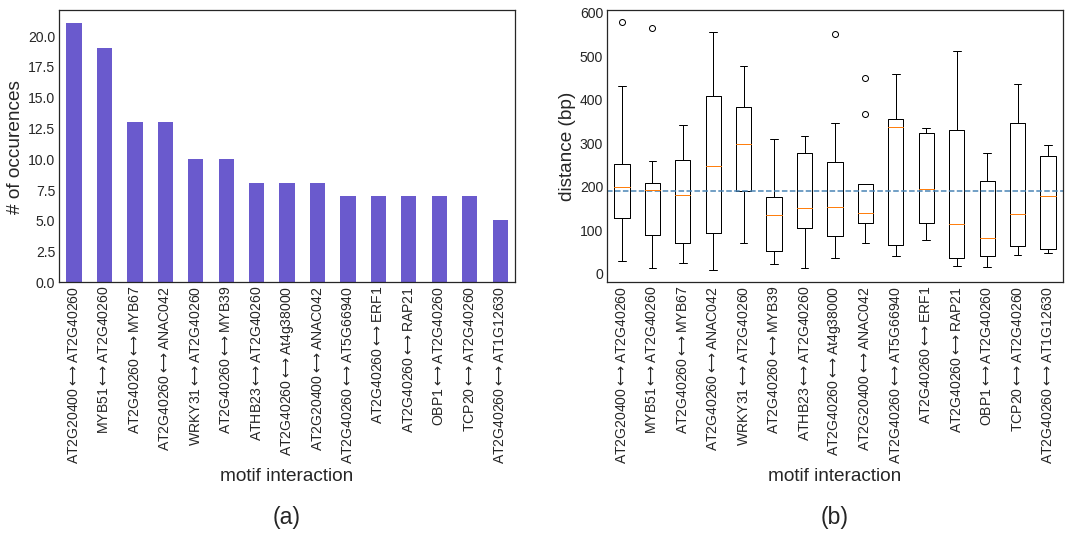

In [25]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_mean_dist=True, dist_color='slateblue', cap_pos=[0.5, -0.89], store_pdf_path='output/arabidopsis_main_distance_boxplot.pdf')

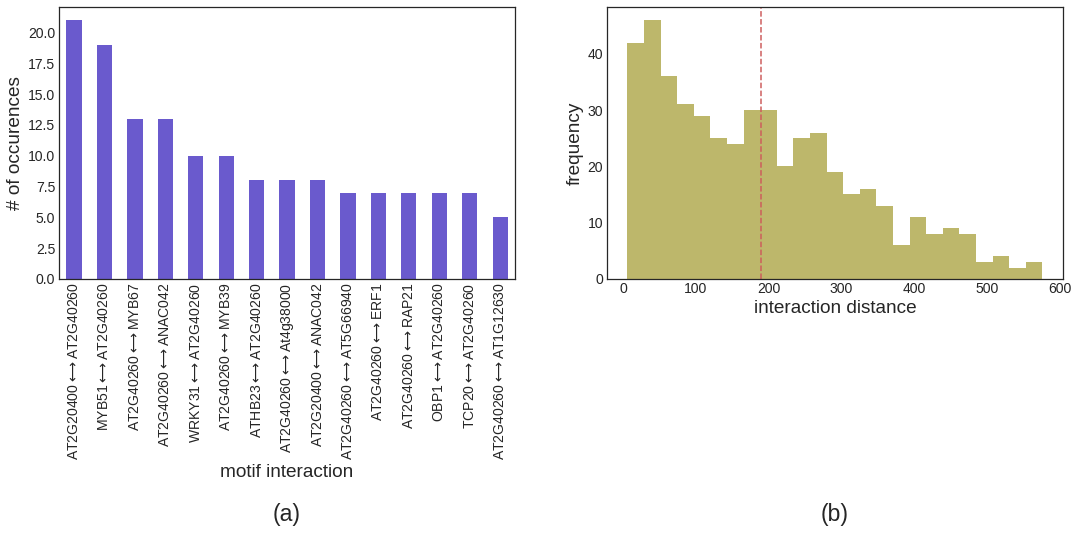

In [26]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_mean_dist=True, dist_colors=['slateblue', 'darkkhaki'], cap_pos=[0.5, -0.89], store_pdf_path='output/arabidopsis_main_distance_histogram.pdf')